# Models

In [ ]:
# Simple Convolutional Neural Network
def build_model1():

  # Define the input shape for the image
  inputs = layers.Input(shape=(112, 112, 3))

  x, min_val, max_val = min_max_scaling(inputs)

  # Define the model

  x = layers.Conv2D(128, (9, 9), padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = Activation('relu')(x)

  x = layers.Conv2D(128, (4, 4), padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = Activation('relu')(x)

  x = layers.Conv2D(128, (4, 4), padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = Activation('relu')(x)

  x = layers.Conv2D(128, (4, 4), padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = Activation('relu')(x)
  
  # Add the final output layer with sigmoid activation function
  x = layers.Conv2D(3, (4, 4), activation='sigmoid', padding='same')(x)

  # Output in original scale
  x = x * (max_val - min_val) + min_val  
 
  model = tf.keras.Model(inputs, x)
  return model


In [ ]:
# SRResNet repurposed for image reconstruction

# Residual blocks
def residual_block_gen():
  model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,3,strides=1,padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Conv2D(64,3,strides=1,padding='same'),
    tf.keras.layers.BatchNormalization(),
  ])
  return model

def build_model2():
  inputs =tf.keras.layers.Input(shape=(112,112,3))

  x, min_val, max_val = min_max_scaling(inputs)

  input_conv=tf.keras.layers.Conv2D(64,9,padding='same')(x)
  input_conv=tf.keras.layers.PReLU()(input_conv)

  Res=input_conv
  for _ in range(5):
    res_output=residual_block_gen()(Res)
    Res=tf.keras.layers.Add()([Res,res_output])

  Res=tf.keras.layers.Conv2D(64,9,padding='same')(Res)
  Res=tf.keras.layers.BatchNormalization()(Res)

  Res=tf.keras.layers.Add()([Res,input_conv])

  output=tf.keras.layers.Conv2D(3,9,activation='sigmoid',padding='same')(Res)

  # Output in original scale
  output = output * (max_val - min_val) + min_val  

  Resnet=tf.keras.models.Model(inputs,output)
  return Resnet

In [ ]:
# Residual Autoencoder architechture

# Residual blocks
def residual_block(input_tensor, filters, strides=1):
    x = layers.Conv2D(filters, (3, 3), strides=strides, padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = layers.Conv2D(filters, (3, 3), strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.add([input_tensor,x])
    
    return x

def build_model3():
  inputs = layers.Input(shape=(112, 112, 3))
    
  # Preprocess the input
  x, min_val, max_val = min_max_scaling(x)

  x = layers.Conv2D(64, (9, 9), padding='same')(inputs)
  x = layers.BatchNormalization()(x)
  x = Activation('relu')(x)

  x = layers.Conv2D(64, (4, 4), strides=2, padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = Activation('relu')(x)

  x = layers.Conv2D(128, (4, 4), strides=2, padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = Activation('relu')(x)

  x = layers.Conv2D(256, (4, 4), strides=2, padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = Activation('relu')(x)

  for _ in range(3):
    x = residual_block(x, 256)

  x = layers.Conv2DTranspose(256, (4, 4), strides=2, padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = Activation('relu')(x)

  x = layers.Conv2DTranspose(128, (4, 4), strides=2, padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = Activation('relu')(x)

  x = layers.Conv2DTranspose(64, (4, 4), strides=2, padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = Activation('relu')(x)

  x = layers.Conv2DTranspose(3, (9, 9), activation='sigmoid', padding='same')(x) 

  # Output in original scale
  x = x * (max_val - min_val) + min_val
    
  model = tf.keras.Model(inputs, x)
  return model


# Models plots

### CNN

In [ ]:
build_model1().summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 112, 112, 3)]     0         
                                                                 
 conv2d_34 (Conv2D)          (None, 112, 112, 128)     31232     
                                                                 
 batch_normalization_39 (Bat  (None, 112, 112, 128)    512       
 chNormalization)                                                
                                                                 
 activation_30 (Activation)  (None, 112, 112, 128)     0         
                                                                 
 conv2d_35 (Conv2D)          (None, 112, 112, 128)     262272    
                                                                 
 batch_normalization_40 (Bat  (None, 112, 112, 128)    512       
 chNormalization)                                          

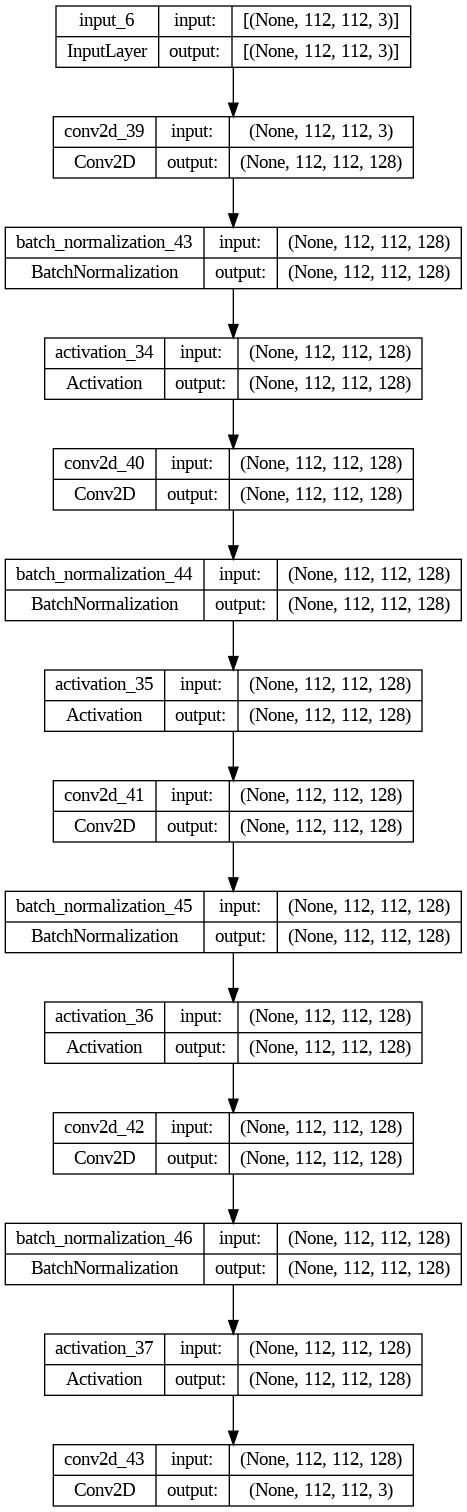

In [ ]:
tf.keras.utils.plot_model(build_model1(),show_shapes=True)

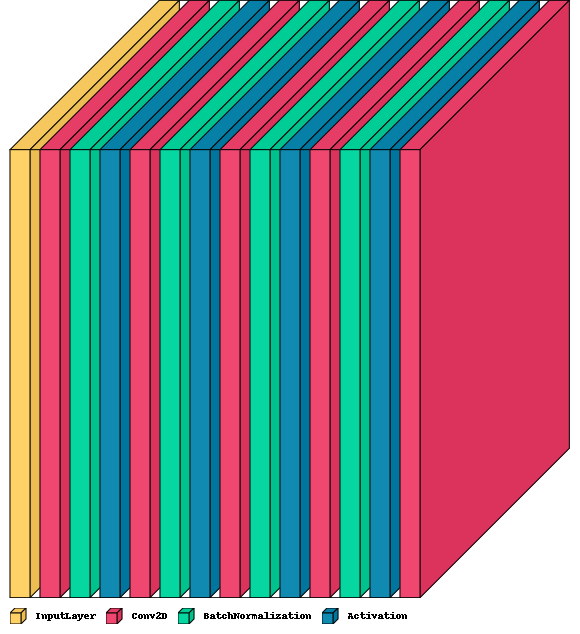

In [ ]:
visualkeras.layered_view(build_model1(), to_file='output.png',legend=True)
image = cv2.imread("output.png")
cv2_imshow(image)

### ResNet

In [ ]:
build_model2().summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_49 (Conv2D)             (None, 112, 112, 64  15616       ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 p_re_lu (PReLU)                (None, 112, 112, 64  802816      ['conv2d_49[0][0]']              
                                )                                                           

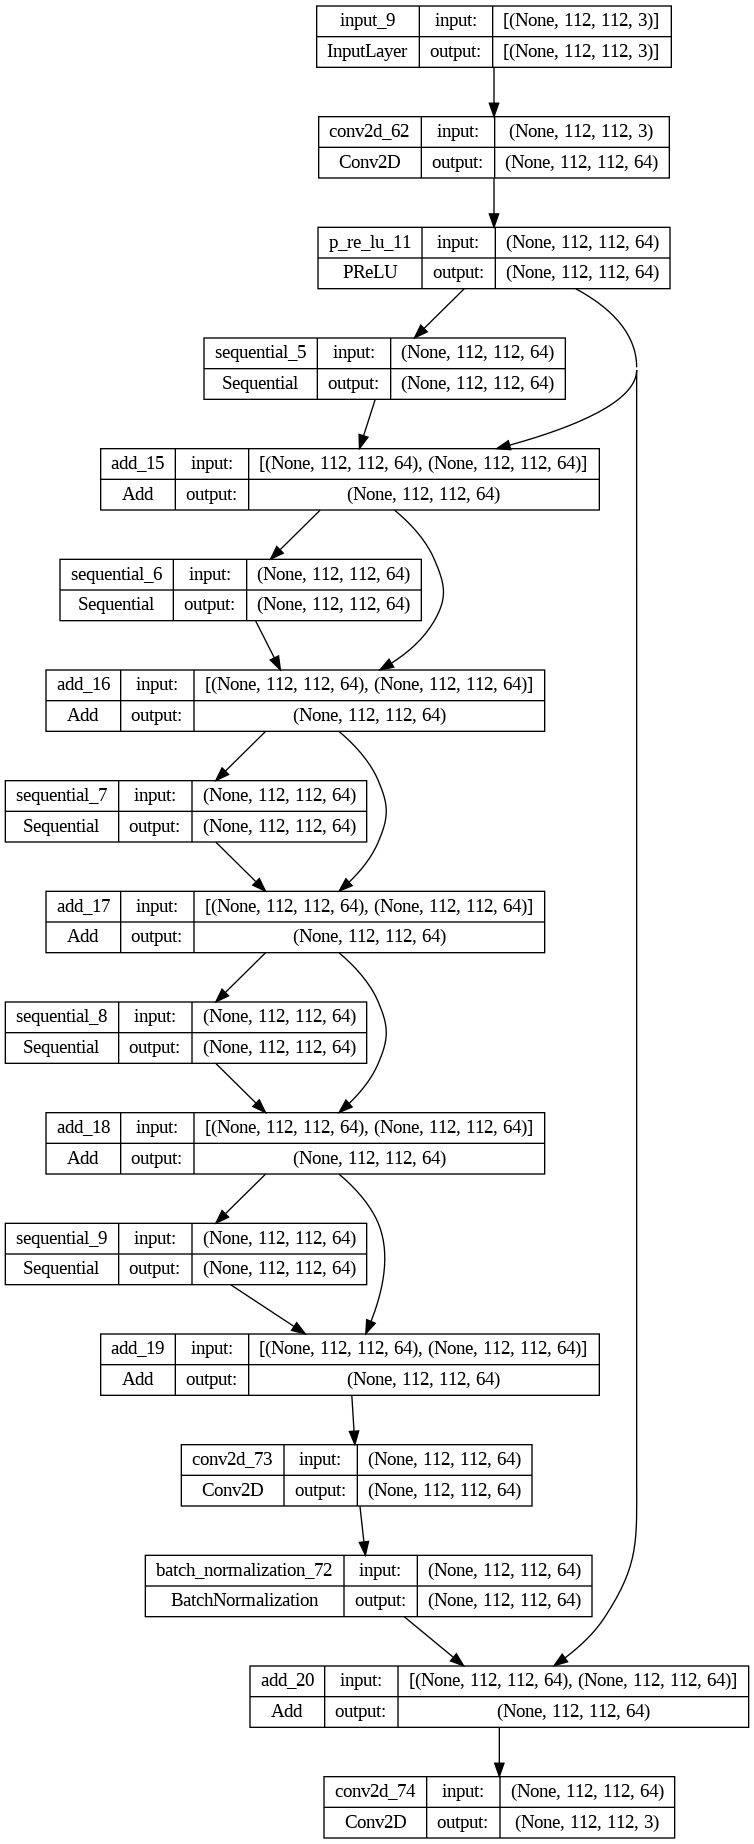

In [ ]:
tf.keras.utils.plot_model(build_model2(),show_shapes=True)

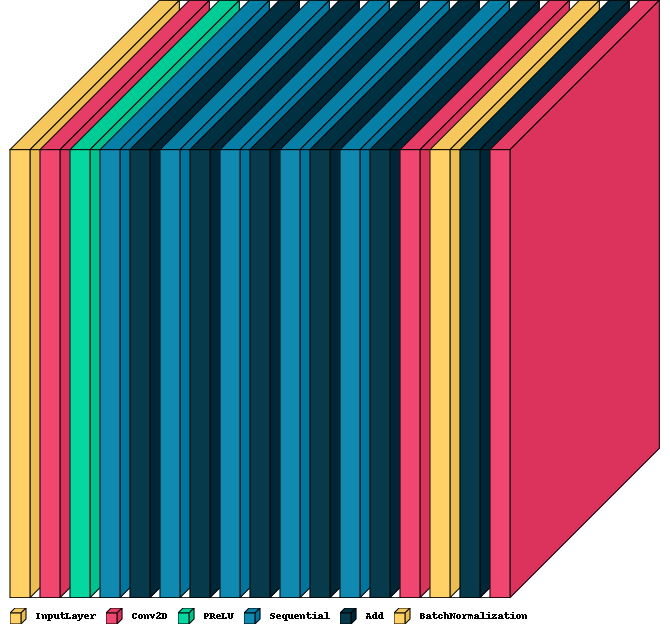

In [ ]:
visualkeras.layered_view(build_model2(), to_file='output.png',legend=True)
image = cv2.imread("output.png")
cv2_imshow(image)

### Residual Autoencoder

In [ ]:
build_model3().summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.math.reduce_min_2 (TFOpLamb  ()                  0           ['input_4[0][0]']                
 da)                                                                                              
                                                                                                  
 tf.math.reduce_max_2 (TFOpLamb  ()                  0           ['input_4[0][0]']                
 da)                                                                                        

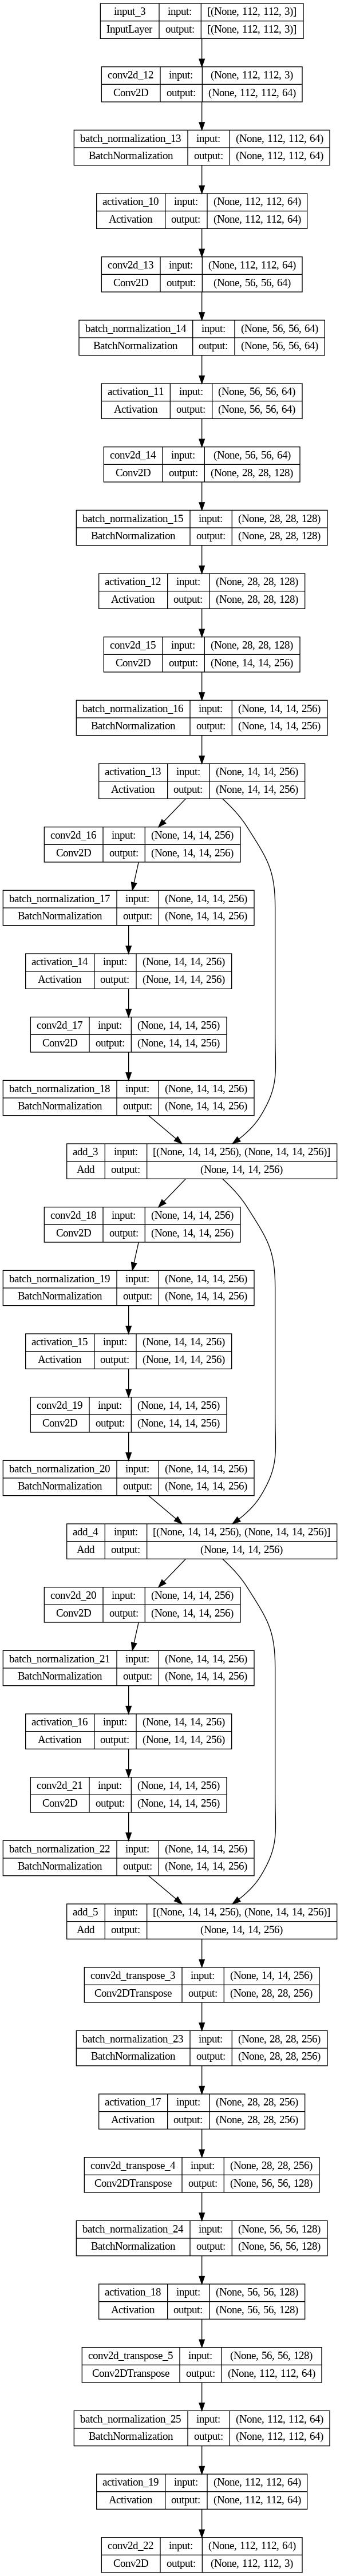

In [ ]:
tf.keras.utils.plot_model(build_model3(),show_shapes=True)

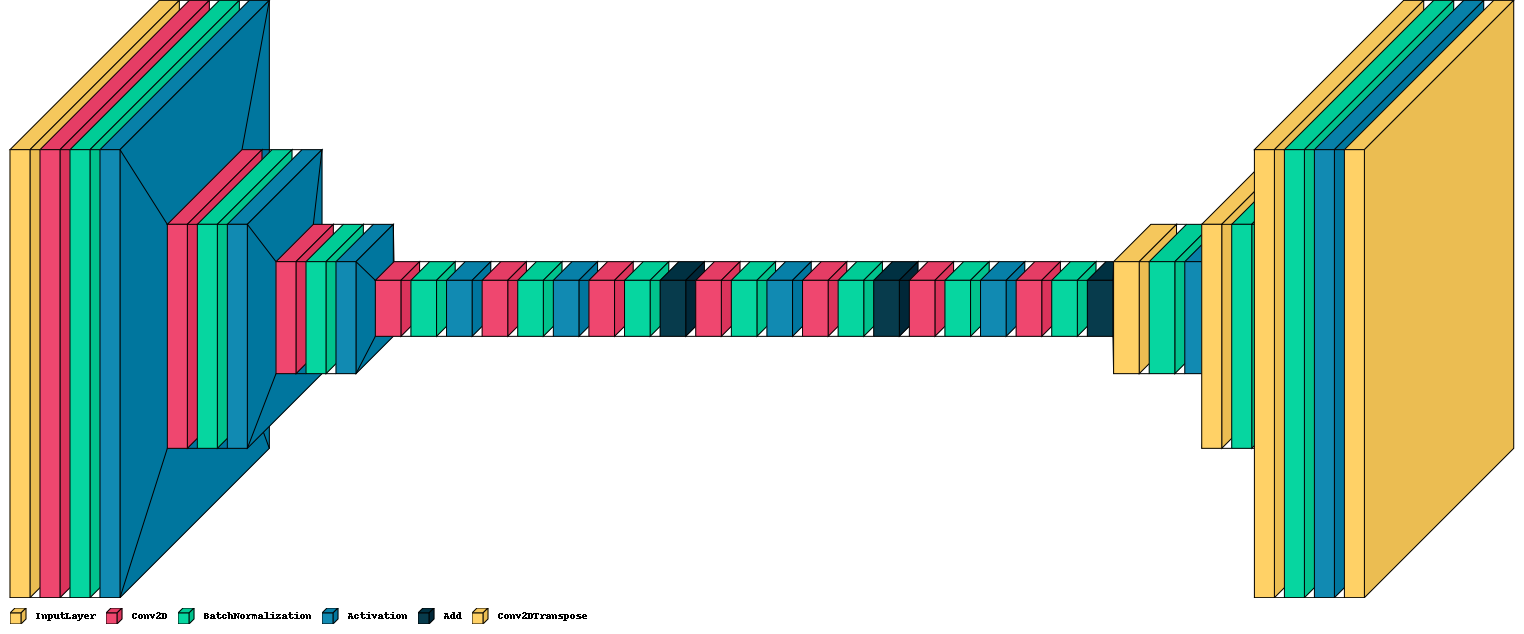

In [ ]:
visualkeras.layered_view(build_model3(), to_file='output.png',legend=True)
image = cv2.imread("output.png")
cv2_imshow(image)